In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/CDSS/Desktop/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


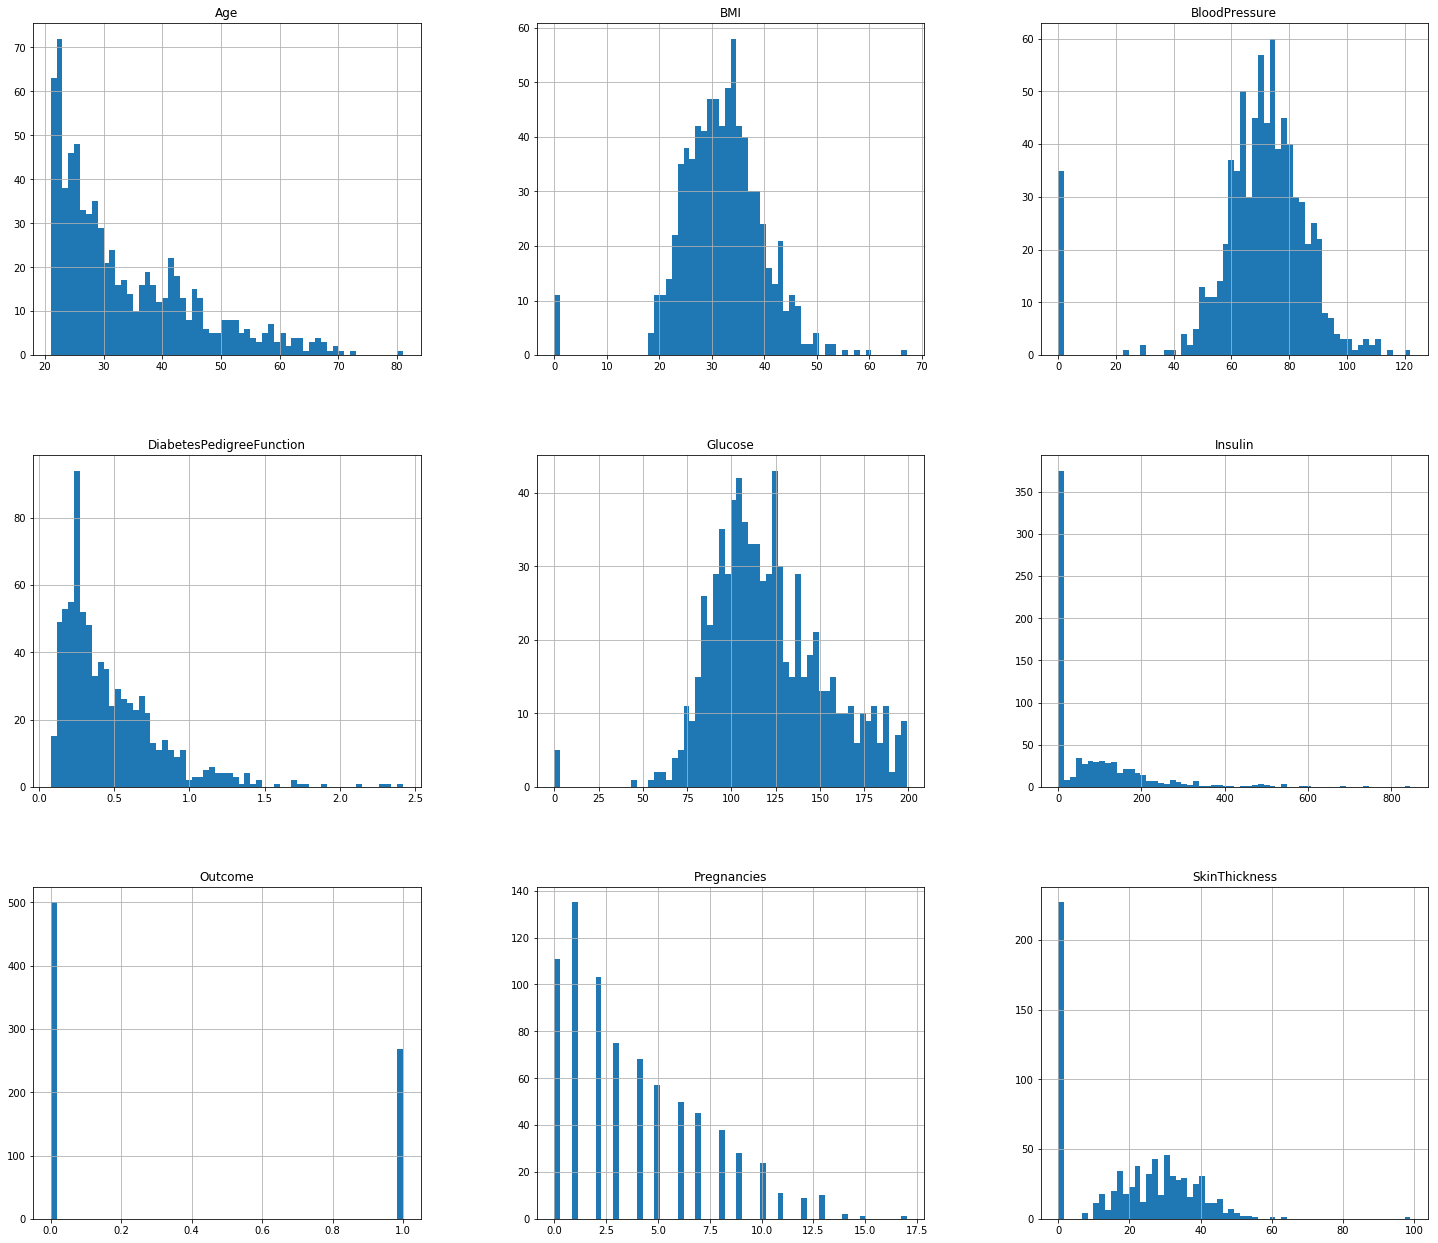

In [5]:
#Visualizing aspects of the dataset

df.hist(bins=60,figsize=(25,22))
plt.show()

In [6]:
#Removing duplicated data points

df.drop_duplicates(inplace=True)

In [7]:
#Creating a train and test set
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy()

In [8]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.141716,0.121486,-0.073931,-0.060392,0.014989,0.000059,0.518860,0.213308
Glucose,0.141716,1.000000,0.141357,0.014250,0.315009,0.218666,0.126901,0.260488,0.469778
BloodPressure,0.121486,0.141357,1.000000,0.229245,0.091801,0.253048,0.043195,0.229738,0.049962
SkinThickness,-0.073931,0.014250,0.229245,1.000000,0.445776,0.418529,0.192791,-0.153916,0.066809
Insulin,-0.060392,0.315009,0.091801,0.445776,1.000000,0.193414,0.211073,-0.042326,0.129652
BMI,0.014989,0.218666,0.253048,0.418529,0.193414,1.000000,0.147336,0.051733,0.323433
DiabetesPedigreeFunction,0.000059,0.126901,0.043195,0.192791,0.211073,0.147336,1.000000,0.043063,0.171754
Age,0.518860,0.260488,0.229738,-0.153916,-0.042326,0.051733,0.043063,1.000000,0.240137
Outcome,0.213308,0.469778,0.049962,0.066809,0.129652,0.323433,0.171754,0.240137,1.000000


In [9]:
correlation_matrix['Outcome'].sort_values()

BloodPressure               0.049962
SkinThickness               0.066809
Insulin                     0.129652
DiabetesPedigreeFunction    0.171754
Pregnancies                 0.213308
Age                         0.240137
BMI                         0.323433
Glucose                     0.469778
Outcome                     1.000000
Name: Outcome, dtype: float64

In [15]:
#Handling missing data

names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for name in names: train_df[name].replace(0, np.nan, inplace=True)

#Handling missing data

names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

In [11]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
423,2,115.0,64.0,22.0,NaN,30.8,0.421,21,0
367,0,101.0,64.0,17.0,NaN,21.0,0.252,21,0
36,11,138.0,76.0,NaN,NaN,33.2,0.420,35,0
380,1,107.0,72.0,30.0,82.0,30.8,0.821,24,0
574,1,143.0,86.0,30.0,330.0,30.1,0.892,23,0


In [12]:
glucose_median = train_df["Glucose"].median()
blood_pressure_median = train_df["BloodPressure"].median()
skin_thickness_median = train_df["SkinThickness"].median()
insulin_median = train_df["Insulin"].median()
bmi_median = train_df["BMI"].median()
age_median = train_df["Age"].median()
dpf_median = train_df['DiabetesPedigreeFunction'].median()

In [13]:
train_df["Glucose"].fillna(glucose_median, inplace=True)
train_df["BloodPressure"].fillna(blood_pressure_median, inplace=True)
train_df["SkinThickness"].fillna(skin_thickness_median, inplace=True)
train_df["Insulin"].fillna(insulin_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)
train_df["Age"].fillna(age_median, inplace=True)
train_df["DiabetesPedigreeFunction"].fillna(dpf_median, inplace=True)

In [14]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
423,2,115.0,64.0,22.0,121.0,30.8,0.421,21,0
367,0,101.0,64.0,17.0,121.0,21.0,0.252,21,0
36,11,138.0,76.0,29.0,121.0,33.2,0.420,35,0
380,1,107.0,72.0,30.0,82.0,30.8,0.821,24,0
574,1,143.0,86.0,30.0,330.0,30.1,0.892,23,0


In [21]:
#Encoding categorial attributes
# Copy original dataframe and add new column with random fitness values
temp_df = train_df.copy()
fitness_values = ["bad", "moderate", "good", "very good",]
temp_df['fitness'] = np.random.choice(fitness_values, temp_df.shape[0])

temp_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fitness
423,2,115.0,64.0,22.0,121.0,30.8,0.421,21,0,good
367,0,101.0,64.0,17.0,121.0,21.0,0.252,21,0,moderate
36,11,138.0,76.0,29.0,121.0,33.2,0.420,35,0,moderate
380,1,107.0,72.0,30.0,82.0,30.8,0.821,24,0,bad
574,1,143.0,86.0,30.0,330.0,30.1,0.892,23,0,very good


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
fitness_encode = encoder.fit_transform(temp_df['fitness'])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {fitness_encode[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [1 2 2 0 3 2 3 0 2 1]


In [29]:
#Rescaling or standardizing attributes
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()


temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()



C:\ProgramData\Anaconda3\envs\deep learning\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.058824,0.266234,0.488372,0.392857,0.128606,0.171779,0.116567,0.166667,0.0
2,0.470588,0.902597,0.465116,0.392857,0.128606,0.104294,0.253629,0.183333,1.0
3,0.058824,0.292208,0.488372,0.285714,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.603896,0.186047,0.500000,0.185096,0.509202,0.943638,0.200000,1.0
5,0.294118,0.467532,0.581395,0.392857,0.128606,0.151329,0.052519,0.150000,0.0


In [31]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()


C:\ProgramData\Anaconda3\envs\deep learning\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.058824,0.266234,0.488372,0.392857,0.128606,0.171779,0.116567,0.166667,0.0
2,0.470588,0.902597,0.465116,0.392857,0.128606,0.104294,0.253629,0.183333,1.0
3,0.058824,0.292208,0.488372,0.285714,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.603896,0.186047,0.500000,0.185096,0.509202,0.943638,0.200000,1.0
5,0.294118,0.467532,0.581395,0.392857,0.128606,0.151329,0.052519,0.150000,0.0
